In [0]:
from pandas import read_csv


In [0]:
A = read_csv("/content/Cars93.csv")


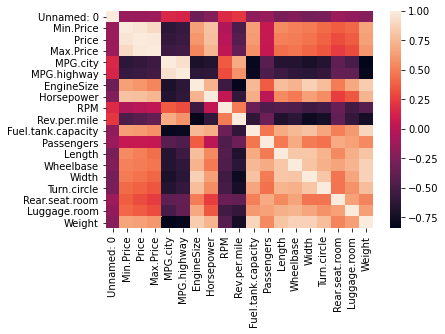

In [40]:
import seaborn as sb
sb.heatmap(A.corr()
)

In [41]:
#Weight ~ Fuel.tank.capacity   EngineSize   Wheelbase   Width


A[["Fuel.tank.capacity","EngineSize","Wheelbase","Width"]].corr()

,Fuel.tank.capacity,EngineSize,Wheelbase,Width
Fuel.tank.capacity,1.000000,0.759306,0.757674,0.798719
EngineSize,0.759306,1.000000,0.732484,0.867110
Wheelbase,0.757674,0.732484,1.000000,0.807213
Width,0.798719,0.867110,0.807213,1.000000


In [0]:
X = A[["Fuel.tank.capacity","EngineSize","Wheelbase","Width"]]
Y = A[["Weight"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=33)


In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error


In [44]:
#mean_absolute_error(ytest,pred)

mean_squared_error(ytest,pred)

#explained_variance_score(ytest,pred)

66674.84729153436

In [0]:
penalty = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]

error = []
from sklearn.linear_model import Ridge,Lasso
for i in penalty:
   rr = Ridge(alpha=i)
   model = rr.fit(xtrain,ytrain)
   pred = model.predict(xtest)
   error.append(mean_squared_error(ytest,pred))


In [46]:
zip(penalty,error)


In [0]:
penalty = range(2,200,1)

error = []
from sklearn.linear_model import Ridge,Lasso
for i in penalty:
   rr = Ridge(alpha=i)
   model = rr.fit(xtrain,ytrain)
   pred = model.predict(xtest)
   error.append(mean_squared_error(ytest,pred))


In [0]:
list(zip(penalty,error))


In [0]:

penalty = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]

error = []
from sklearn.linear_model import Ridge,Lasso
for i in penalty:
   rr = Lasso(alpha=i)
   model = rr.fit(xtrain,ytrain)
   pred = model.predict(xtest)
   error.append(mean_squared_error(ytest,pred))


In [0]:
list(zip(penalty,error))



In [0]:

penalty = range(2,200,1)

error = []
from sklearn.linear_model import Ridge,Lasso
for i in penalty:
   rr = Lasso(alpha=i)
   model = rr.fit(xtrain,ytrain)
   pred = model.predict(xtest)
   error.append(mean_squared_error(ytest,pred))



In [49]:
zip(penalty,error)


In [0]:
#bestmodel --> criterion is MAE should be low


In [0]:
from sklearn.model_selection import GridSearchCV
rr = Ridge()
tp = {"alpha":range(0,20,1)}
cv = GridSearchCV(rr,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)

In [52]:
cvmodel.best_params_


{'alpha': 7}

In [0]:
from sklearn.model_selection import GridSearchCV
rr = Lasso()
tp = {"alpha":range(0,20,1)}
cv = GridSearchCV(rr,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)

In [30]:
cvmodel.best_params_

{'alpha': 13}

In [54]:
rr = Ridge(alpha=7)
model = rr.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,pred)

66410.22839971326

In [55]:
ls = Lasso(alpha=13)
model = ls.fit(xtrain,ytrain)
pred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,pred)



66955.1070170576

In [33]:
rr.coef_

array([[59.7498352 , 91.71859101, 35.63605971, 19.56655053]])

In [34]:
ls.coef_

array([59.85917634, 85.57709348, 36.0650055 , 19.58919075])

In [35]:
lm.coef_

array([[ 60.71101784, 125.57233879,  35.60209937,  10.40764413]])

In [57]:
A[["Fuel.tank.capacity","EngineSize","Wheelbase","Width","Weight"]].corr()

,Fuel.tank.capacity,EngineSize,Wheelbase,Width,Weight
Fuel.tank.capacity,1.000000,0.759306,0.757674,0.798719,0.894018
EngineSize,0.759306,1.000000,0.732484,0.867110,0.845075
Wheelbase,0.757674,0.732484,1.000000,0.807213,0.871895
Width,0.798719,0.867110,0.807213,1.000000,0.874961
Weight,0.894018,0.845075,0.871895,0.874961,1.000000


In [56]:
A[["Fuel.tank.capacity","EngineSize","Wheelbase","Width","Weight"]][0:3]

,Fuel.tank.capacity,EngineSize,Wheelbase,Width,Weight
0,13.2,1.8,102,68,2705
1,18.0,3.2,115,71,3560
2,16.9,2.8,102,67,3375
